In [51]:
from datetime import date, timedelta, datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import functions as f

### Welche Kryptowährungen am beliebtesten in letzter Zeit waren?

In [52]:
def plot_top_5_cryptos_from_data(data, tokens):
    
    latest_caps = []
    
    for token_name, df in zip(tokens.values(), data):
        if 'market_cap' not in df.columns:
            continue  # if there is no data about capitalisation
        last_row = df.dropna(subset=['market_cap']).iloc[-1]
        market_cap = last_row['market_cap']
        latest_caps.append((token_name, market_cap))

    # sort top-5 and take the most popular ones
    top5 = sorted(latest_caps, key=lambda x: x[1], reverse=True)[:5]
    
    labels = [item[0] for item in top5]
    values = [item[1] for item in top5]

    plt.figure(figsize=(7, 7))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Top-5 Kryptowährungen nach Marktkapitalisierung (aktuell)')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


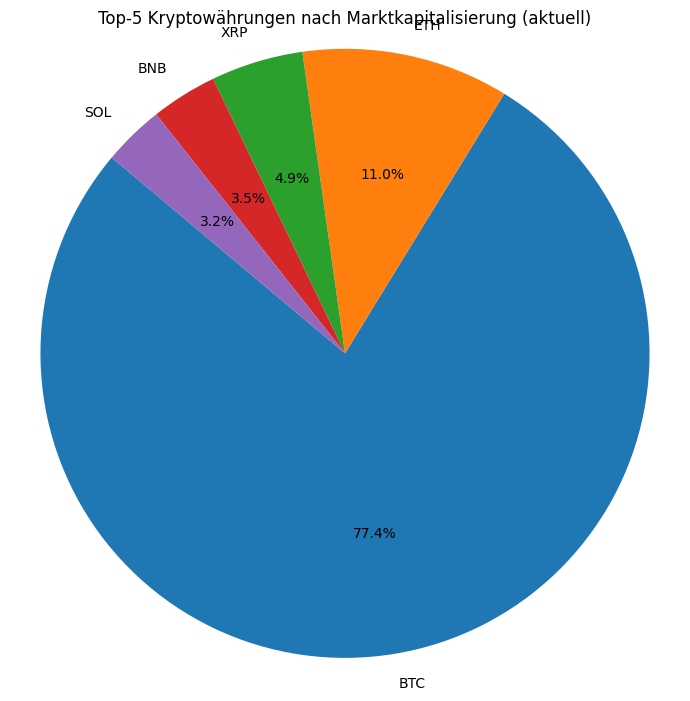

In [53]:
tokens = {'bitcoin': 'BTC', 'ethereum': 'ETH', 'ripple': 'XRP', 'binancecoin': 'BNB', 'solana': 'SOL',
          'dogecoin': 'DOGE', 'cardano': 'ADA', 'tron': 'TRX', 'chainlink': 'LINK', 'avalanche-2': 'AVAX'}

data = [f.parse_token_data(token, 365) for token in tokens.keys()]
plot_top_5_cryptos_from_data(data, tokens)


Die beliebteste Kryptowährung auf dem Markt war Bitcoin mit einer Marktdurchdringung von über 77 %. Die zweitbeliebteste war Ethereum.

### Wie sieht die Marktkapitalisierung von alleine Bitcoin im letzten Jahr aus?

In [ ]:
def plot_bitcoin_marketcap_1y_from_df(df):
    

    if 'market_cap' not in df.columns:
        print("Error: No column 'market_cap'.")
        return

#sicherstellen, dass keine NaN gibt
    df = df.sort_index().dropna(subset=['market_cap'])

    df_last_year = df.last('365D')

    plt.figure(figsize=(10, 5))
    plt.plot(df_last_year.index, df_last_year['market_cap'], color='orange')
    plt.title('Dynamik der Bitcoin-Marktkapitalisierung im letzten Jahr')
    plt.xlabel('Datum')
    plt.ylabel('Kapitalisierung (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\julia\AppData\Local\Temp\ipykernel_20452\3930078878.py:12: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_last_year = df.last('365D')


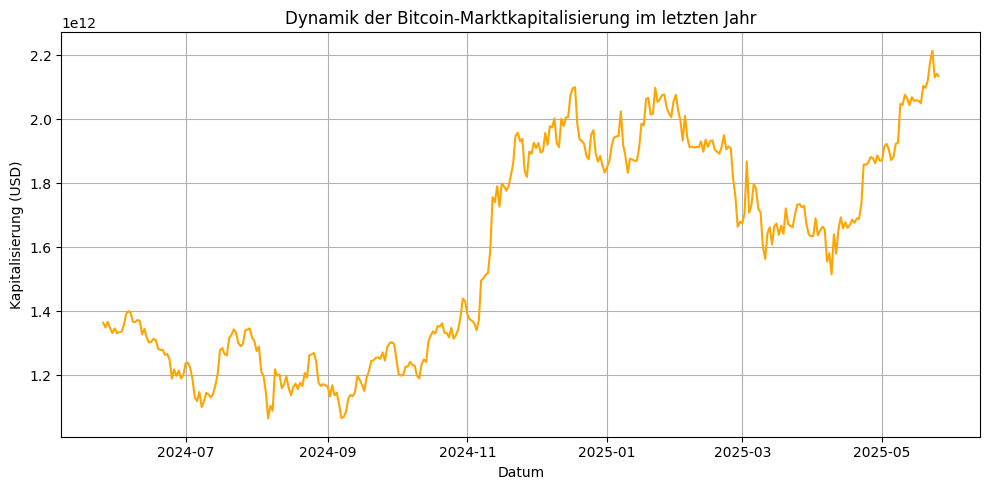

In [55]:
token = 'bitcoin'
days = 365  

df = f.parse_token_data(token, days)
plot_bitcoin_marketcap_1y_from_df(df)


Die Marktkapitalisierung von Bitcoin ist im letzten Jahr um 50 % gestiegen. Im Laufe des Jahres gab es zwei bedeutende Bitcoin-Abstürze: einen im September 2024, den zweiten im März 2025. Von November 2024 bis Februar 2025 ist ein signifikantes Wachstum der Währung zu beobachten, derzeit wächst die Marktkapitalisierung von Bitcoin.

### Wie schneiden die Wachstumsraten der Marktkapitalisierung der fünf größten Kryptowährungen im Vergleich ab?

In [56]:
def plot_top_5_marketcap_growth(data, tokens):
    
    growth_data = []

    for token_name, df in zip(tokens.values(), data):
        if 'market_cap' not in df.columns or df.empty:
            continue

        df = df.sort_index().dropna(subset=['market_cap'])
        if len(df) < 2:
            continue

        start_cap = df['market_cap'].iloc[0]
        end_cap = df['market_cap'].iloc[-1]
        growth_pct = ((end_cap - start_cap) / start_cap) * 100
        growth_data.append((token_name, growth_pct))

    if not growth_data:
        print("No data for show.")
        return

    labels, growth = zip(*growth_data)
    plt.figure(figsize=(9, 5))
    plt.bar(labels, growth, color='purple')
    plt.title('Wachstum der Marktkapitalisierung der Top 5 Kryptowährungen über 12 Monate (%)')
    plt.ylabel('Wachstum (%)')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()


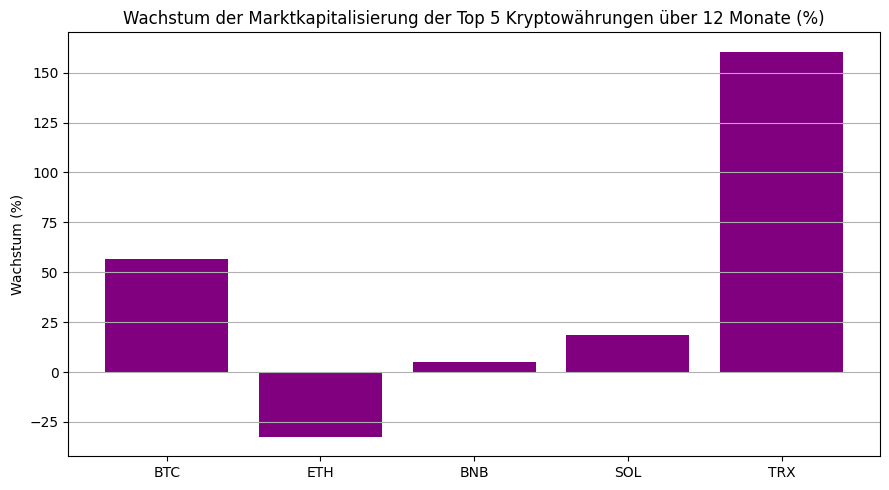

In [57]:
tokens = {'bitcoin': 'BTC', 'ethereum': 'ETH', 'binancecoin': 'BNB', 'solana': 'SOL', 'tron': 'TRX'}
data = [f.parse_token_data(token, 365) for token in tokens.keys()]

plot_top_5_marketcap_growth(data, tokens)


Tron verzeichnete mit einem Endwert von 150 % den größten Zugewinn. Ethereum hingegen verlor 25 % seiner Marktkapitalisierung. Die übrigen Kryptowährungen blieben mehr oder weniger stabil.

### Wie viele Dollar der Weltkapitalisierung nimmt der Kryptomarkt ein (im letzten Jahr)?

In [58]:
def plot_total_marketcap_monthly(data, tokens):
    """
    Строит график общей капитализации крипторынка по месяцам за последние 2 года,
    используя локальные данные из parse_token_data().
    """

    # Объединяем капитализации всех токенов по дате
    combined_df = pd.DataFrame()

    for df in data:
        if 'market_cap' not in df.columns:
            continue
        df = df[['market_cap']].copy()
        df = df.dropna()
        if combined_df.empty:
            combined_df = df
        else:
            combined_df = combined_df.join(df, how='outer', rsuffix='_dup')

    combined_df['total_market_cap'] = combined_df.sum(axis=1, numeric_only=True)

    combined_df = combined_df.sort_index()
    monthly_df = combined_df['total_market_cap'].resample('ME').mean()

    last_date = monthly_df.index.max()
    one_year_ago = last_date - pd.DateOffset(months=12)
    monthly_df = monthly_df.loc[monthly_df.index >= one_year_ago]

    plt.figure(figsize=(12, 6))
    plt.plot(monthly_df.index, monthly_df.values, marker='o', color='teal')
    plt.title('Gesamtmarktkapitalisierung der Kryptowährungen nach Monat (letztes Jahr)')
    plt.xlabel('Monat')
    plt.ylabel('Kapitalisierung (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()


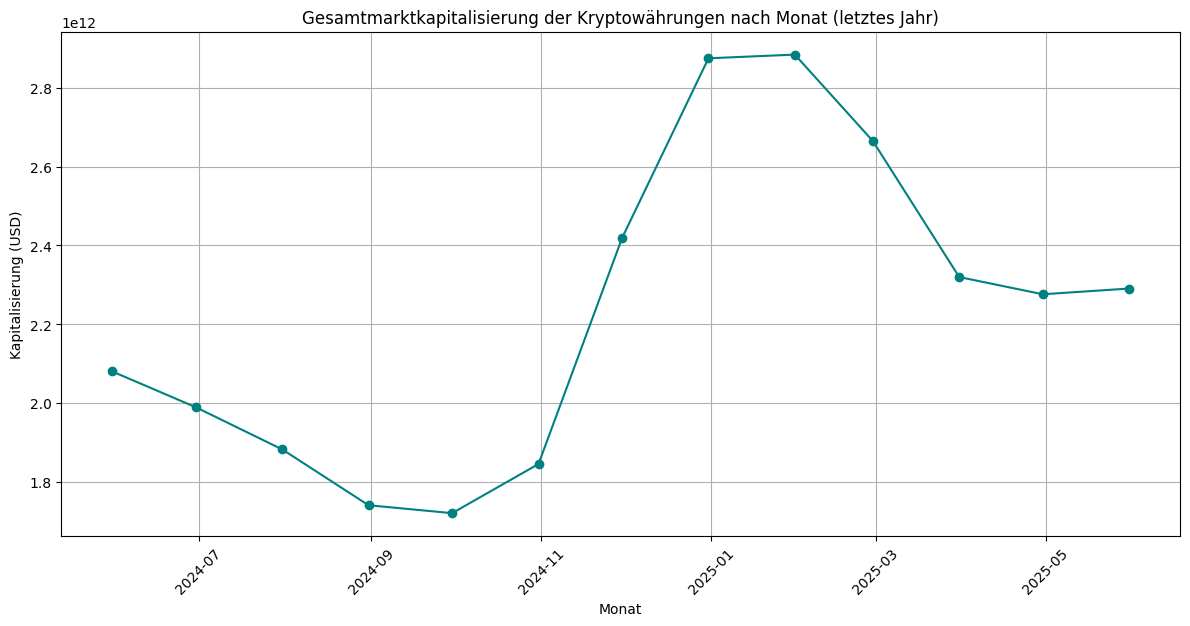

In [59]:
tokens = {
    'bitcoin': 'BTC', 'ethereum': 'ETH', 'ripple': 'XRP', 'binancecoin': 'BNB', 'solana': 'SOL',
    'dogecoin': 'DOGE', 'cardano': 'ADA', 'tron': 'TRX', 'chainlink': 'LINK', 'avalanche-2': 'AVAX'
}

data = [f.parse_token_data(token, 365) for token in tokens.keys()]
plot_total_marketcap_monthly(data, tokens)

Anfang 2025 erreichte die Gesamtkapitalisierung des Kryptomarktes einen Rekordwert von 2,9 Billionen US-Dollar. Aktuell liegt die Kapitalisierung bei rund 2,3 Billionen US-Dollar, 0,2 Billionen mehr als im Juni letzten Jahres.